# Задание 1

Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
Масштабируйте данные с помощью StandardScaler.
Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
boston = load_boston()

In [3]:
# Создадим датафреймы X и y
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = pd.DataFrame(boston.target, columns=['Price'])

In [4]:
# Разобьем датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Стандартизируем выборки и создадим соответствующие датафреймы
scaler = StandardScaler()
X_train_std = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_std = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [6]:
X_train_std.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02
mean,-1.842585e-16,5.056461e-17,3.074548e-15,-5.056461e-17,-5.221483e-15,-4.031016e-15,-1.001124e-15,-3.176777e-16,-3.654942e-17,-1.534457e-16,2.005876e-14,5.754473e-15,-1.853578e-16
std,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00
min,-4.061414e-01,-5.003201e-01,-1.487791e+00,-2.780887e-01,-1.458711e+00,-3.461733e+00,-2.348206e+00,-1.258391e+00,-9.740476e-01,-1.307684e+00,-2.568944e+00,-3.892249e+00,-1.510559e+00
25%,-3.979761e-01,-5.003201e-01,-8.502733e-01,-2.780887e-01,-8.887828e-01,-6.003488e-01,-8.228264e-01,-8.081981e-01,-6.243599e-01,-7.533563e-01,-6.821011e-01,2.098797e-01,-8.005057e-01
50%,-3.776748e-01,-5.003201e-01,-3.521669e-01,-2.780887e-01,-1.572334e-01,-1.494427e-01,3.270201e-01,-2.971196e-01,-5.077973e-01,-4.460660e-01,1.714705e-01,3.830012e-01,-2.157763e-01
75%,-4.582119e-02,3.645893e-01,1.033237e+00,-2.780887e-01,6.338607e-01,4.528240e-01,8.974727e-01,7.481981e-01,3.081406e-01,1.578434e+00,8.453428e-01,4.316600e-01,5.513070e-01
max,9.630689e+00,3.824227e+00,2.433163e+00,3.595975e+00,2.675394e+00,3.477564e+00,1.124581e+00,3.907900e+00,1.706891e+00,1.849573e+00,1.653990e+00,4.441800e-01,3.592534e+00


In [7]:
# Построим модель t-SNE на тренировочных данных
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_std)

print(f'До применения TSNE: {X_train.shape}\nПосле применения TSNE: {X_train_tsne.shape}')

До применения TSNE: (404, 13)
После применения TSNE: (404, 2)


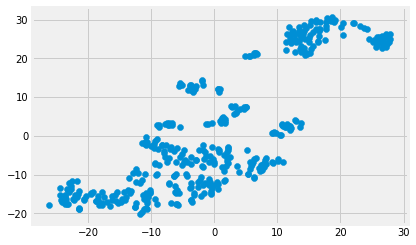

In [8]:
# Построим диаграмму рассеяния по полученным данным

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

plt.show()

# Задание 2

С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.
Вычислите средние значения price и CRIM в разных кластерах.

In [9]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [10]:
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)

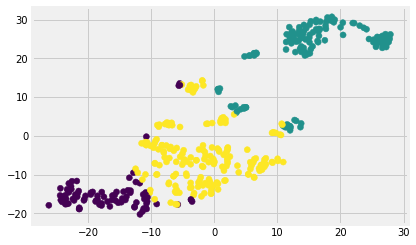

In [11]:
labels_train = kmeans.fit_predict(X_train_std)
labels_train

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)

plt.show()

In [12]:
# Проверим как K-means разбил по кластерам 
pd.value_counts(labels_train)

2    191
1    127
0     86
dtype: int64

In [13]:
# Определим среднее значение цены в различных кластерах
print(f'Среднее значение price в кластере 0: {y_train[labels_train == 0].mean()["Price"]:.2f}')
print(f'Среднее значение price в кластере 1: {y_train[labels_train == 1].mean()["Price"]:.2f}')
print(f'Среднее значение price в кластере 2: {y_train[labels_train == 2].mean()["Price"]:.2f}')

Среднее значение price в кластере 0: 27.79
Среднее значение price в кластере 1: 16.17
Среднее значение price в кластере 2: 24.96


In [14]:
# Определим среднее значение CRIM в различных кластерах
print(f'Среднее значение CRIM в кластере 0: {X_train[labels_train == 0].mean()["CRIM"]:.2f}')
print(f'Среднее значение CRIM в кластере 1: {X_train[labels_train == 1].mean()["CRIM"]:.2f}')
print(f'Среднее значение CRIM в кластере 2: {X_train[labels_train == 2].mean()["CRIM"]:.2f}')

Среднее значение CRIM в кластере 0: 0.07
Среднее значение CRIM в кластере 1: 10.80
Среднее значение CRIM в кластере 2: 0.42


# Задание 3

Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [15]:
# Понизим размерность данных тестовой выборки до двух измерений с помощью алгоритма t-SNE

X_test_tsne = tsne.fit_transform(X_test_std)

print(f'До применения TSNE: {X_train.shape}\nПосле применения TSNE: {X_train_tsne.shape}')

До применения TSNE: (404, 13)
После применения TSNE: (404, 2)


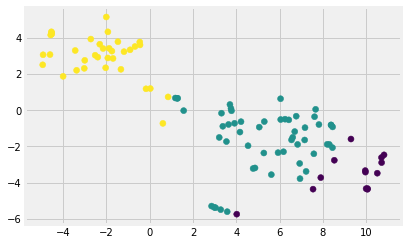

In [16]:
labels_test = kmeans.fit_predict(X_test_std)
labels_test

plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=labels_test)

plt.show()

In [17]:
# Определим среднее значение цены в различных кластерах
print(f'Среднее значение price в кластере 0: {y_test[labels_test == 0].mean()["Price"]:.2f}')
print(f'Среднее значение price в кластере 1: {y_test[labels_test == 1].mean()["Price"]:.2f}')
print(f'Среднее значение price в кластере 2: {y_test[labels_test == 2].mean()["Price"]:.2f}')

Среднее значение price в кластере 0: 33.87
Среднее значение price в кластере 1: 21.55
Среднее значение price в кластере 2: 16.44


In [18]:
# Определим среднее значение CRIM в различных кластерах
print(f'Среднее значение CRIM в кластере 0: {X_test[labels_test == 0].mean()["CRIM"]:.2f}')
print(f'Среднее значение CRIM в кластере 1: {X_test[labels_test == 1].mean()["CRIM"]:.2f}')
print(f'Среднее значение CRIM в кластере 2: {X_test[labels_test == 2].mean()["CRIM"]:.2f}')

Среднее значение CRIM в кластере 0: 0.09
Среднее значение CRIM в кластере 1: 0.25
Среднее значение CRIM в кластере 2: 10.17
